In [96]:

import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore


In [97]:
#initialize the app

cred = credentials.Certificate('claves.json')
firebase_admin.initialize_app(cred)


ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [98]:
# Use a service account.
cred = credentials.Certificate('claves.json')
db = firestore.client()


In [99]:
# Read from the review collection
houses_ref = db.collection('houses')

In [100]:
#get all the info
houses = houses_ref.get()


In [101]:
len(houses)

335

In [102]:
#see data in the reviews
for house in houses:
    print(u'{} => {}'.format(house.id, house.to_dict()))



0EkpCWxIhCqPlDebJPsj => {'hasLift': True, 'thumbnail': 'https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/16/0a/d9/1208259535.jpg', 'longitude': -3.7172319, 'highlight': {'groupDescription': 'Destacado'}, 'detailedType': {'typology': 'flat'}, 'topNewDevelopment': False, 'topPlus': False, 'distance': '2099', 'status': 'good', 'rooms': 3, 'size': 62.0, 'floor': 'bj', 'newDevelopment': False, 'hasPlan': True, 'externalReference': '31648', 'operation': 'sale', 'has360': False, 'has3DTour': False, 'description': '31Real Servicios Inmobiliarios VENDE: Bajo interior en buen estado, con 3 habitaciones y un baño. Distribuida en: salón, cocina independiente amueblada y equipada con electrodomésticos, 3 habitaciones, un baño completo con ducha y un AMPLIO PATIO con acceso directo desde una de las habitaciones. La vivienda tiene una superficie de 53 metros. En cuanto a las calidades de la vivienda, se reformó en el año 2010 y dispone de ventanas de climalit correderas, suelo de 

In [126]:
import pandas as pd

# Create an empty dataframe
data = pd.DataFrame()

# Iterate over the houses and add each house's data to the dataframe
for house in houses:
    house_data = house.to_dict()
    data = data.append(house_data, ignore_index=True)


C:\Users\beatr\AppData\Local\Temp\ipykernel_26984\623801187.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_26984\623801187.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_26984\623801187.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_26984\623801187.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=Tr

In [109]:
data.head()

,hasLift,thumbnail,longitude,highlight,detailedType,topNewDevelopment,topPlus,distance,status,rooms,...,propertyCode,hasVideo,country,province,showAddress,latitude,address,labels,parkingSpace,newDevelopmentFinished
0,True,https://img3.idealista.com/blur/WEB_LISTING/0/...,-3.717232,{'groupDescription': 'Destacado'},{'typology': 'flat'},False,False,2099,good,3,...,104048250,False,es,Madrid,False,40.432376,Calle de Altamirano,NaN,NaN,NaN
1,True,https://img3.idealista.com/blur/WEB_LISTING/0/...,-3.700147,NaN,{'typology': 'flat'},False,False,326,good,2,...,103760246,False,es,Madrid,False,40.418381,Calle del Caballero de Gracia,NaN,NaN,NaN
2,True,https://img3.idealista.com/blur/WEB_LISTING/0/...,-3.710539,NaN,{'typology': 'flat'},False,False,1074,good,1,...,104069505,False,es,Madrid,False,40.424692,Calle del Álamo,NaN,NaN,NaN
3,False,https://img3.idealista.com/blur/WEB_LISTING/0/...,-3.697977,{'groupDescription': 'Destacado'},{'typology': 'flat'},False,False,1745,good,2,...,104064088,False,es,Madrid,False,40.431888,Calle CASTILLO,NaN,NaN,NaN
4,True,https://img3.idealista.com/blur/WEB_LISTING/0/...,-3.710564,NaN,{'typology': 'flat'},False,False,1183,good,2,...,104049063,False,es,Madrid,False,40.425842,barrio Argüelles,NaN,NaN,NaN


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hasLift                 331 non-null    object 
 1   thumbnail               328 non-null    object 
 2   longitude               335 non-null    float64
 3   highlight               75 non-null     object 
 4   detailedType            335 non-null    object 
 5   topNewDevelopment       335 non-null    bool   
 6   topPlus                 335 non-null    bool   
 7   distance                335 non-null    object 
 8   status                  335 non-null    object 
 9   rooms                   335 non-null    int64  
 10  size                    335 non-null    float64
 11  floor                   324 non-null    object 
 12  newDevelopment          335 non-null    bool   
 13  hasPlan                 335 non-null    bool   
 14  externalReference       196 non-null    ob

### Creating Type Variable

In [127]:
import ast

def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        return s  # return the original string if it can't be parsed

data['detailedType'] = data['detailedType'].apply(safe_literal_eval)


# Extract the 'typology' and 'subTypology' values
data['typology'] = data['detailedType'].apply(lambda x: x.get('typology'))
data['subTypology'] = data['detailedType'].apply(lambda x: x.get('subTypology'))



In [128]:
# Modify 'typology' based on 'subTypology'
data['typology'] = data.apply(lambda row: row['typology'] if pd.isnull(row['subTypology']) else row['typology'] + ' ' + row['subTypology'], axis=1)

# Drop the 'subTypology' column
data = data.drop(columns=['subTypology'])
data = data.drop(columns=['detailedType'])

In [129]:
data["typology"].value_counts()

flat                        308
flat studio                  10
flat penthouse               10
flat duplex                   5
chalet semidetachedHouse      2
Name: typology, dtype: int64

### Parking variables 

In [130]:
#values that parkingSpace can take, convert to string first
data['parkingSpace'] = data['parkingSpace'].astype(str)
data['parkingSpace'].unique()


array(['nan',
       "{'isParkingSpaceIncludedInPrice': False, 'hasParkingSpace': True, 'parkingSpacePrice': 40000.0}",
       "{'isParkingSpaceIncludedInPrice': True, 'hasParkingSpace': True}",
       "{'isParkingSpaceIncludedInPrice': False, 'hasParkingSpace': True, 'parkingSpacePrice': 45000.0}",
       "{'isParkingSpaceIncludedInPrice': False, 'hasParkingSpace': True, 'parkingSpacePrice': 29900.0}",
       "{'isParkingSpaceIncludedInPrice': False, 'hasParkingSpace': True, 'parkingSpacePrice': 25000.0}",
       "{'isParkingSpaceIncludedInPrice': False, 'hasParkingSpace': True, 'parkingSpacePrice': 50000.0}",
       "{'isParkingSpaceIncludedInPrice': False, 'hasParkingSpace': True, 'parkingSpacePrice': 29000.0}",
       "{'isParkingSpaceIncludedInPrice': False, 'hasParkingSpace': True, 'parkingSpacePrice': 62000.0}",
       "{'isParkingSpaceIncludedInPrice': False, 'hasParkingSpace': True, 'parkingSpacePrice': 30000.0}"],
      dtype=object)

In [133]:
# Create columns 
data['hasParking'] = data['parkingSpace'].apply(lambda x: 'yes' if x != 'nan' else 'no')
data['hasParking'].value_counts()



no     295
yes     40
Name: hasParking, dtype: int64

In [134]:
#drop parkingSpace column
data = data.drop(columns=['parkingSpace'])

### Creating final dataset For Modeling part 

In [136]:
#Remove id variables: thumbnail, externalReference, url, hasVideo, hasStaging, has460, has3DTour, propertyCode, labels
data = data.drop(columns=['thumbnail', 'externalReference', 'url', 'hasVideo', 'hasStaging', 'has360', 'has3DTour', 'propertyCode', 'labels'])

#Remove specific variables: showAddress, suggestedTexts, numPhotos, description, operation, address
data = data.drop(columns=['showAddress', 'suggestedTexts', 'numPhotos', 'description', 'operation', 'address'])


In [138]:

#drop highlight 
data = data.drop(columns=['highlight'])

In [143]:
#drop newDevelopmentFinished
data = data.drop(columns=['newDevelopmentFinished'])

In [160]:
#drop topNewDevelopment, topPlus
data = data.drop(columns=['topNewDevelopment', 'topPlus'])


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hasLift            331 non-null    object 
 1   longitude          335 non-null    float64
 2   topNewDevelopment  335 non-null    bool   
 3   topPlus            335 non-null    bool   
 4   distance           335 non-null    object 
 5   status             335 non-null    object 
 6   rooms              335 non-null    int64  
 7   size               335 non-null    float64
 8   floor              324 non-null    object 
 9   newDevelopment     335 non-null    bool   
 10  hasPlan            335 non-null    bool   
 11  bathrooms          335 non-null    int64  
 12  municipality       335 non-null    object 
 13  price              335 non-null    float64
 14  exterior           326 non-null    object 
 15  propertyType       335 non-null    object 
 16  neighborhood       335 non

### Storing a copy of the cleaned dataset in Firebase

In [145]:
#Store the data in firebase as a new collection called cleaned_data
cleaned_data_ref = db.collection('cleaned_data')

# Convert the dataframe to a dictionary
data_dict = data.to_dict(orient='records')

# Upload the data

for row in data_dict:
    cleaned_data_ref.add(row)

### EDA 

In [147]:
data.head()

,hasLift,longitude,topNewDevelopment,topPlus,distance,status,rooms,size,floor,newDevelopment,...,exterior,propertyType,neighborhood,district,priceByArea,country,province,latitude,typology,hasParking
0,True,-3.717232,False,False,2099,good,3,62.0,bj,False,...,False,flat,Argüelles,Moncloa,4355.0,es,Madrid,40.432376,flat,no
1,True,-3.700147,False,False,326,good,2,91.0,2,False,...,False,flat,Sol,Centro,7571.0,es,Madrid,40.418381,flat,no
2,True,-3.710539,False,False,1074,good,1,52.0,1,False,...,True,flat,Malasaña-Universidad,Centro,8173.0,es,Madrid,40.424692,flat,no
3,False,-3.697977,False,False,1745,good,2,50.0,2,False,...,True,flat,Trafalgar,Chamberí,5900.0,es,Madrid,40.431888,flat,no
4,True,-3.710564,False,False,1183,good,2,120.0,14,False,...,True,flat,Argüelles,Moncloa,11667.0,es,Madrid,40.425842,flat,no


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hasLift            331 non-null    object 
 1   longitude          335 non-null    float64
 2   topNewDevelopment  335 non-null    bool   
 3   topPlus            335 non-null    bool   
 4   distance           335 non-null    object 
 5   status             335 non-null    object 
 6   rooms              335 non-null    int64  
 7   size               335 non-null    float64
 8   floor              324 non-null    object 
 9   newDevelopment     335 non-null    bool   
 10  hasPlan            335 non-null    bool   
 11  bathrooms          335 non-null    int64  
 12  municipality       335 non-null    object 
 13  price              335 non-null    float64
 14  exterior           326 non-null    object 
 15  propertyType       335 non-null    object 
 16  neighborhood       335 non

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

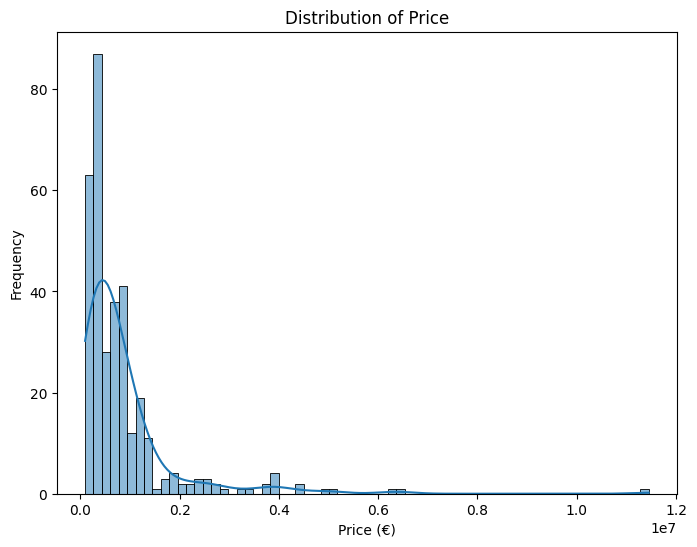

In [150]:
# Plot the distribution of the 'price' variable
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()


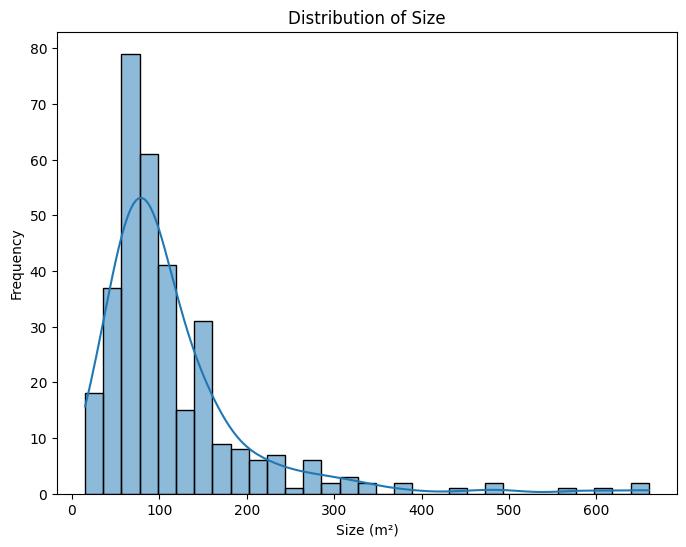

In [151]:
#Distribution of the 'size' variable
plt.figure(figsize=(8, 6))
sns.histplot(data['size'], kde=True)
plt.title('Distribution of Size')
plt.xlabel('Size (m²)')
plt.ylabel('Frequency')
plt.show()


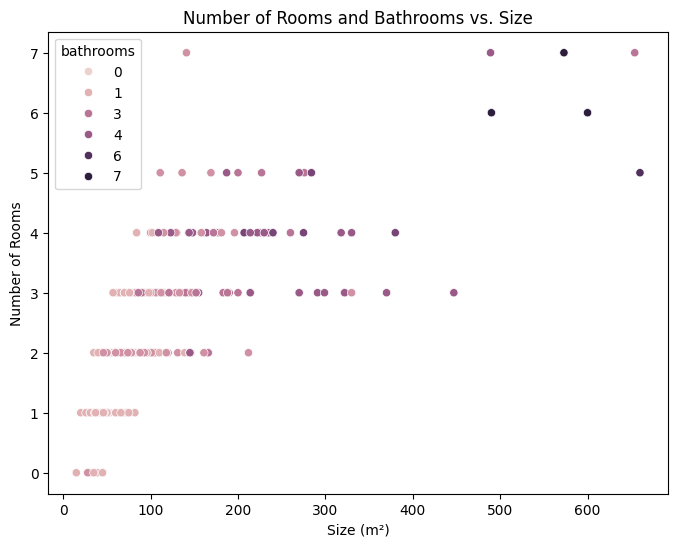

In [154]:
#A plot that relates size , number of rooms and bathrooms 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='rooms', data=data, hue='bathrooms')
plt.title('Number of Rooms and Bathrooms vs. Size')
plt.xlabel('Size (m²)')
plt.ylabel('Number of Rooms')
plt.show()


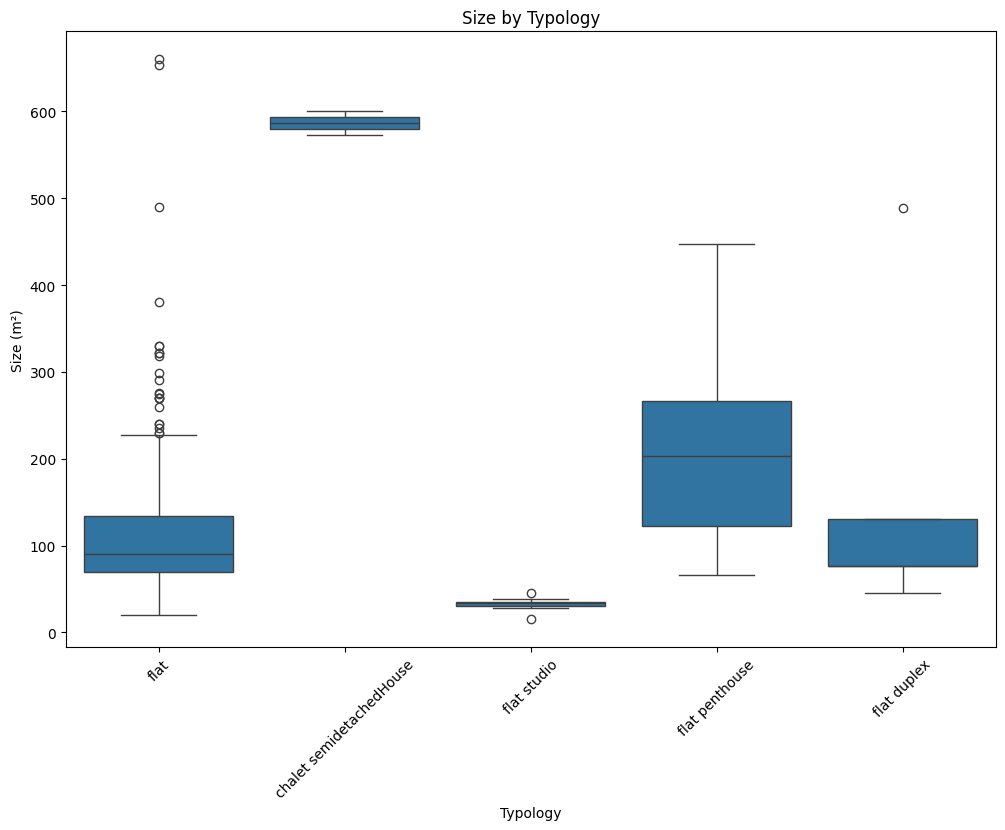

In [155]:
#Distribution of size by typology
plt.figure(figsize=(12, 8))
sns.boxplot(x='typology', y='size', data=data)
plt.title('Size by Typology')
plt.xlabel('Typology')
plt.ylabel('Size (m²)')
plt.xticks(rotation=45)
plt.show()


C:\Users\beatr\AppData\Local\Temp\ipykernel_26984\2470490749.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


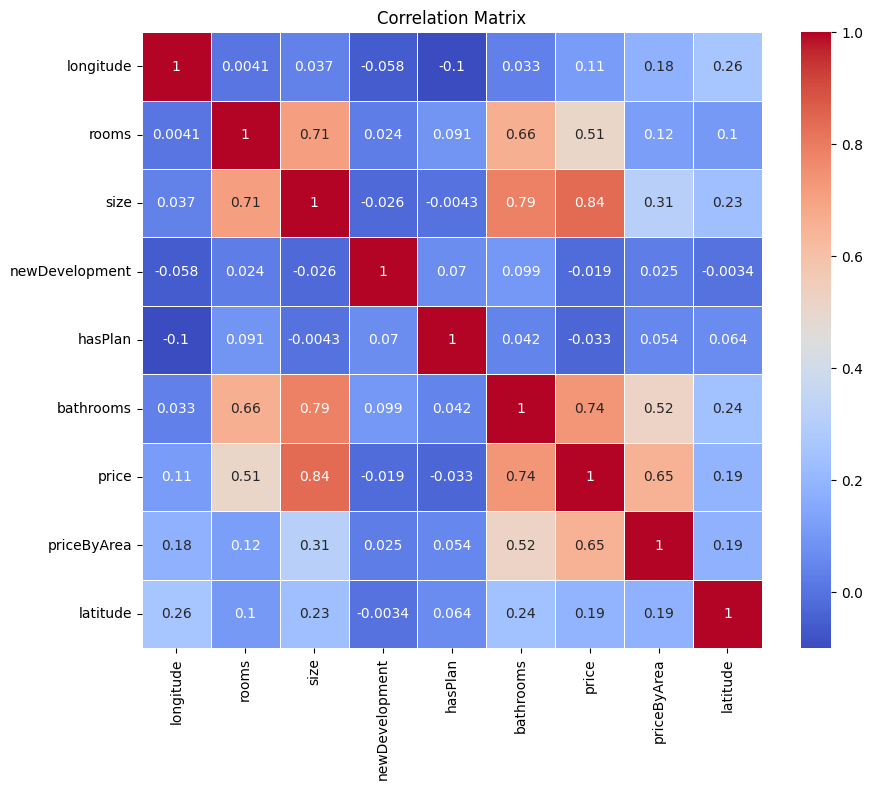

In [161]:
#Correlation matrix of numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


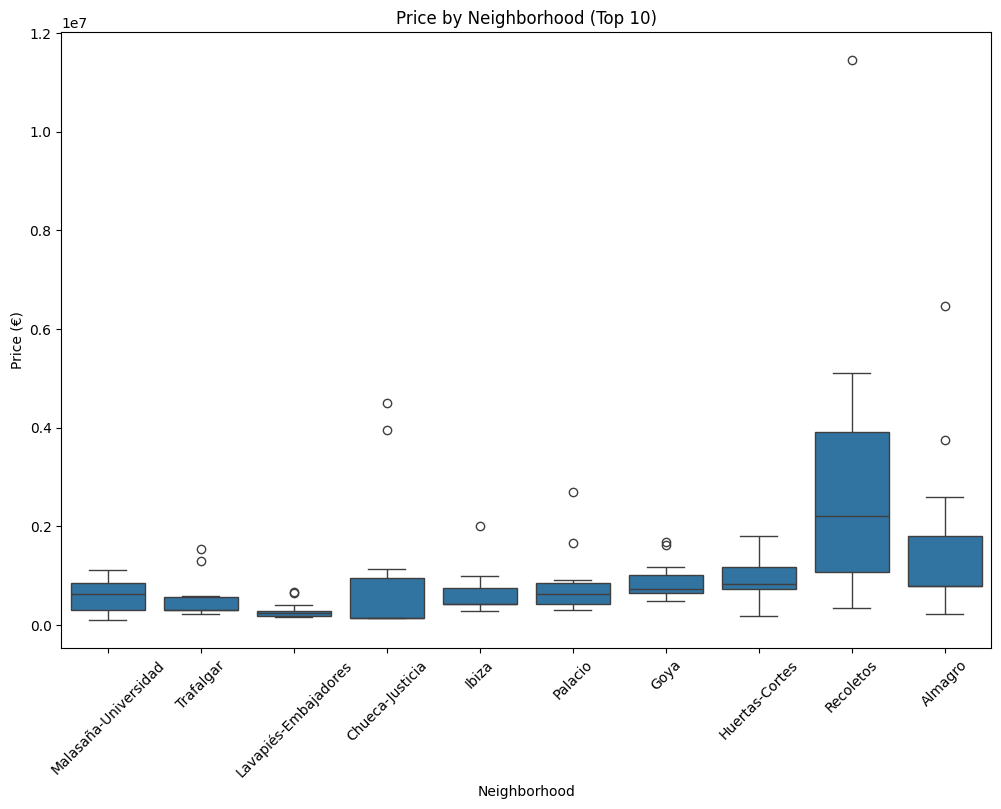

In [163]:
# Count the occurrences of each neighborhood
neighborhood_counts = data['neighborhood'].value_counts()

# Select the top 10 neighborhoods
top_10_neighborhoods = neighborhood_counts.head(10).index

# Filter the data for the top 10 neighborhoods
filtered_data = data[data['neighborhood'].isin(top_10_neighborhoods)]

# Plot price and neighborhood for the top 10 neighborhoods
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighborhood', y='price', data=filtered_data)
plt.title('Price by Neighborhood (Top 10)')
plt.xlabel('Neighborhood')
plt.ylabel('Price (€)')
plt.xticks(rotation=45)
plt.show()


### Modeling 

In [164]:
#Create regression model to predict price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the input variables X, and the target variable y
X = data[['size', 'rooms', 'bathrooms']]
y = data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2: {r2:.2f}')




Mean Squared Error: 702905752420.34
R^2: 0.74
